In [1]:
import pandas as pd
import matplotlib.pyplot as plt


## Clackamas River Data Source

http://odfwrecoverytracker.org/download/


In [2]:
# Read in the salmon raw data file

salmon_file = "Resources/Chinook_Lower_Columbia_Abundance.csv"
raw_salmon_df = pd.read_csv(salmon_file)

raw_salmon_df.head(2)

,ESU,ESU ID,Stratum,Stratum ID,Independent Population,Independent Population ID,spawning_year,Lifestage,WildCount,NOSAEJ,CI_Wild,AbGoal,mile_Surveyed,total_site,AbComments,AbSource,Comments_WildCount
0,Lower Columbia,10116060000,Cascade,50116060302,Clackamas,30116060322,1974,adult,179.0,NaN,NaN,NaN,NaN,NaN,NaN,"Appendix C, LC Recovery Plan, Table B.1-1.",NaN
1,Lower Columbia,10116060000,Cascade,50116060302,Clackamas,30116060322,1975,adult,144.0,NaN,NaN,NaN,NaN,NaN,NaN,"Appendix C, LC Recovery Plan, Table B.1-1.",NaN


In [3]:
# We want to look at the Clackamas poplation since it has a decent data population
clean_salmon_df = raw_salmon_df[
    (raw_salmon_df["Independent Population"] == "Clackamas") & 
    (raw_salmon_df["spawning_year"] > 2004) & (raw_salmon_df["spawning_year"] < 2020)
]
clean_salmon_df = clean_salmon_df.reset_index(drop=True)
clean_salmon_df.head(2)

,ESU,ESU ID,Stratum,Stratum ID,Independent Population,Independent Population ID,spawning_year,Lifestage,WildCount,NOSAEJ,CI_Wild,AbGoal,mile_Surveyed,total_site,AbComments,AbSource,Comments_WildCount
0,Lower Columbia,10116060000,Cascade,50116060302,Clackamas,30116060322,2005,adult,2295.0,2729.0,434.0,NaN,NaN,NaN,Count at North Fork Dam / 0.78 to expand to ar...,Schroeder et al. 2007,NaN
1,Lower Columbia,10116060000,Cascade,50116060302,Clackamas,30116060322,2006,adult,1049.0,1234.0,211.0,NaN,NaN,NaN,Count at North Fork Dam / 0.78 to expand to ar...,Schroeder et al. 2007,NaN


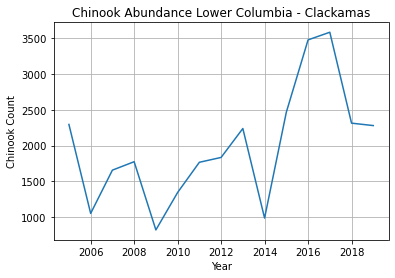

In [4]:
# Let's do a quick line plot
fig, ax = plt.subplots()
ax.set_xlabel("Year")
ax.set_ylabel("Chinook Count")
ax.set_title("Chinook Abundance Lower Columbia - Clackamas")
ax.grid(True)
ax.plot(clean_salmon_df["spawning_year"], clean_salmon_df["WildCount"] )

In [5]:
# Read in Bonneville Dam Spring Chinook Counts
bonneville_file = "Resources/Chinook_Bonneville_Counts.csv"

# Grab only the columns we want
bonneville_salmon_df = pd.read_csv(bonneville_file, usecols=["Project","Year","Dates", "Chinook"])

# Make sure we only get 2000 to 2020
bonneville_salmon_df =  bonneville_salmon_df[ 
    (bonneville_salmon_df["Year"] > 1999) & 
    (bonneville_salmon_df["Year"] < 2021)
]

# Clean up data types
bonneville_salmon_df["Year"] = bonneville_salmon_df["Year"].astype('int')
bonneville_salmon_df["Chinook"] = bonneville_salmon_df["Chinook"].astype('int')

bonneville_salmon_df

,Project,Year,Dates,Chinook
62,Bonneville,2000,3/15 - 5/31,178302
63,Bonneville,2001,3/15 - 5/31,391367
64,Bonneville,2002,3/15 - 5/31,268813
65,Bonneville,2003,3/15 - 5/31,192010
66,Bonneville,2004,3/15 - 5/31,170152
67,Bonneville,2005,3/15 - 5/31,74038
68,Bonneville,2006,3/15 - 5/31,96456
69,Bonneville,2007,3/15 - 5/31,66624
70,Bonneville,2008,3/15 - 5/31,125543
71,Bonneville,2009,3/15 - 5/31,114525


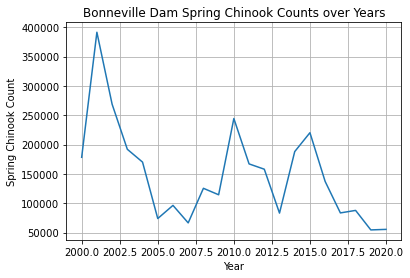

In [6]:
# Quick Plot of the Spring Chinook Counts over Years
fig, ax = plt.subplots()
ax.set_xlabel("Year")
ax.set_ylabel("Spring Chinook Count")
ax.set_title("Bonneville Dam Spring Chinook Counts over Years")
ax.grid(True)
ax.plot(bonneville_salmon_df["Year"], bonneville_salmon_df["Chinook"] )

In [7]:
# Read in Willamette Dam Spring Chinook Counts
willamette_file = "Resources/Chinook_Willamette_Counts.csv"

# Grab only the columns we want
willamette_salmon_df = pd.read_csv(willamette_file, usecols=["Project","Year","Dates", "Chinook"])

# Make sure we only get 2000 to 2020
willamette_salmon_df =  willamette_salmon_df[ 
    (willamette_salmon_df["Year"] > 1999) & 
    (willamette_salmon_df["Year"] < 2021)
]

# Clean up data types
willamette_salmon_df["Year"] = willamette_salmon_df["Year"].astype('int')
willamette_salmon_df["Chinook"] = willamette_salmon_df["Chinook"].astype('int')

willamette_salmon_df

,Project,Year,Dates,Chinook
0,Willamette Falls,2000,3/15 - 5/31,32475
1,Willamette Falls,2001,3/15 - 5/31,41417
2,Willamette Falls,2002,3/15 - 5/31,57163
3,Willamette Falls,2003,3/15 - 5/31,69118
4,Willamette Falls,2004,3/15 - 5/31,81837
5,Willamette Falls,2005,3/15 - 5/31,26956
6,Willamette Falls,2006,3/15 - 5/31,25217
7,Willamette Falls,2007,3/15 - 5/31,16559
8,Willamette Falls,2008,3/15 - 5/31,5679
9,Willamette Falls,2009,3/15 - 5/31,17057


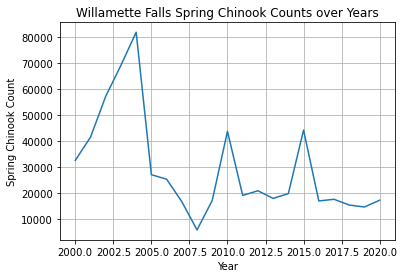

In [8]:
# Quick Plot of the Spring Chinook Counts over Years
fig, ax = plt.subplots()
ax.set_xlabel("Year")
ax.set_ylabel("Spring Chinook Count")
ax.set_title("Willamette Falls Spring Chinook Counts over Years")
ax.grid(True)
ax.plot(willamette_salmon_df["Year"], willamette_salmon_df["Chinook"] )

## Snow Data Source

https://wcc.sc.egov.usda.gov/nwcc/snow-course-sites.jsp?state=OR


In [38]:
# Read in Mt Hood Snow file
mt_hood_snow_file = "Resources/Mt_Hood_Test_Site_Snow.csv"

# Load data
mt_hood_snow_df = pd.read_csv(mt_hood_snow_file, header=[0,1])

#Make sure we only get 2000 to 2020
mt_hood_snow_df =  mt_hood_snow_df[ 
    (mt_hood_snow_df["Water Year"]["Unnamed: 0_level_1"] > 1999) & 
    (mt_hood_snow_df["Water Year"]["Unnamed: 0_level_1"] < 2021)
]

 
mt_hood_snow_df = mt_hood_snow_df[[ 
        ("Water Year","Unnamed: 0_level_1"), 
        ("Mar","Snow Depth (in) Start of Month Values"),
        ("Mar","Snow Water Equivalent (in) Start of Month Values"),
        ("Apr","Snow Depth (in) Start of Month Values"),
        ("Apr","Snow Water Equivalent (in) Start of Month Values"),
        ("May","Snow Depth (in) Start of Month Values"),
        ("May","Snow Water Equivalent (in) Start of Month Values"),
    ]
]
mt_hood_snow_df

Water Year                                   Mar  \
   Unnamed: 0_level_1 Snow Depth (in) Start of Month Values   
19               2000                                 151.0   
20               2001                                  73.0   
21               2002                                 155.0   
22               2003                                  64.0   
23               2004                                 141.0   
24               2005                                  38.0   
25               2006                                 141.0   
26               2007                                 143.0   
27               2008                                 166.0   
28               2009                                 120.0   
29               2010                                  84.0   
30               2011                                 129.0   
31               2012                                 139.0   
32               2013                                 127.0   
33               2014                                 103.0   
34               2015                                  37.0   
35               2016                                  99.0   
36               2017                                 124.0   
37               2018                                 117.0   
38               2019                                 113.0   
39               2020                                 120.0   

                                                     \
   Snow Water Equivalent (in) Start of Month Values   
19                                             60.3   
20                                             28.4   
21                                             66.4   
22                                             21.4   
23                                             54.0   
24                                             12.2   
25                                             53.8   
26                                             48.1   
27                                             64.8   
28                                             41.9   
29                                             32.4   
30                                             40.1   
31                                             48.2   
32                                             44.7   
33                                             42.2   
34                                             14.7   
35                                             39.4   
36                                             41.4   
37                                             36.1   
38                                             35.7   
39                                             41.3   

                                     Apr  \
   Snow Depth (in) Start of Month Values   
19                                 148.0   
20                                  77.0   
21                                 187.0   
22                                 100.0   
23                                 133.0   
24                                  51.0   
25                                 155.0   
26                                 115.0   
27                                 210.0   
28                                 181.0   
29                                 120.0   
30                                 136.0   
31                                 176.0   
32                                 120.0   
33                                 137.0   
34                                  38.0   
35                                 118.0   
36                                 131.0   
37                                 111.0   
38                                 100.0   
39                                 144.0   

                                                     \
   Snow Water Equivalent (in) Start of Month Values   
19                                             69.5   
20                                             35.9   
21                                             77.9   
22     

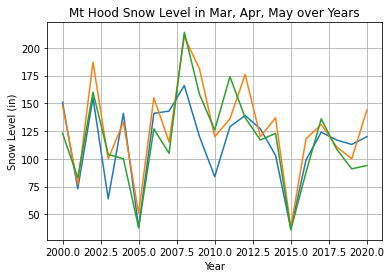

In [41]:
# Quick Plot of the Mar, Apr, May Snow Levels over Years
fig, ax = plt.subplots()
ax.set_xlabel("Year")
ax.set_ylabel("Snow Level (in)")
ax.set_title("Mt Hood Snow Level in Mar, Apr, May over Years")
ax.grid(True)
ax.plot(mt_hood_snow_df[("Water Year","Unnamed: 0_level_1")], mt_hood_snow_df[("Mar","Snow Depth (in) Start of Month Values")] )
ax.plot(mt_hood_snow_df[("Water Year","Unnamed: 0_level_1")], mt_hood_snow_df[("Apr","Snow Depth (in) Start of Month Values")] )
ax.plot(mt_hood_snow_df[("Water Year","Unnamed: 0_level_1")], mt_hood_snow_df[("May","Snow Depth (in) Start of Month Values")] )


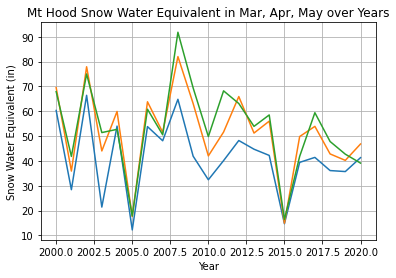

In [43]:
# Quick Plot of the Mar, Apr, May Snow Water Equivalent over Years
fig, ax = plt.subplots()
ax.set_xlabel("Year")
ax.set_ylabel("Snow Water Equivalent (in)")
ax.set_title("Mt Hood Snow Water Equivalent in Mar, Apr, May over Years")
ax.grid(True)
ax.plot(mt_hood_snow_df[("Water Year","Unnamed: 0_level_1")], mt_hood_snow_df[("Mar","Snow Water Equivalent (in) Start of Month Values")] )
ax.plot(mt_hood_snow_df[("Water Year","Unnamed: 0_level_1")], mt_hood_snow_df[("Apr","Snow Water Equivalent (in) Start of Month Values")] )
ax.plot(mt_hood_snow_df[("Water Year","Unnamed: 0_level_1")], mt_hood_snow_df[("May","Snow Water Equivalent (in) Start of Month Values")] )
